# From ASRS
## ACN: 1337572
Comment: Could be UA728_8ff29f6

### Time / Day
Date : 201603  
Local Time Of Day : 0601-1200  
Place  
Locale Reference.Airport : SFO.Airport  
State Reference : CA  
Altitude.MSL.Single Value : 1800  
Environment  
Flight Conditions : IMC  
Weather Elements / Visibility : Rain  

### Aircraft
Reference : X
ATC / Advisory.Tower : SFO  
Aircraft Operator : Air Carrier  
Make Model Name : B757 Undifferentiated or Other Model  
Crew Size.Number Of Crew : 2  
Operating Under FAR Part : Part 121  
Flight Plan : IFR  
Mission : Passenger  
Nav In Use : FMS Or FMC  
Nav In Use : INS  
Nav In Use.Localizer/Glideslope/ILS : Runway 19L  
### Flight Phase : Final Approach
### Airspace.Class B : SFO
Component  
Aircraft Component : ILS/VOR  
Aircraft Reference : X  
Problem : Malfunctioning  
Person : 1  
Reference : 1  
Location Of Person.Aircraft : X  
Location In Aircraft : Flight Deck  
Reporter Organization : Air Carrier  
Function.Flight Crew : Captain  
Function.Flight Crew : Pilot Not Flying  
Qualification.Flight Crew : Air Transport Pilot (ATP)  
Experience.Flight Crew.Total : 10082  
Experience.Flight Crew.Last 90 Days : 150  
Experience.Flight Crew.Type : 9235  
ASRS Report Number.Accession Number : 1337572  
Human Factors : Distraction  
Person : 2  
Reference : 2  
Location Of Person.Aircraft : X  
Location In Aircraft : Flight Deck  
Reporter Organization : Air Carrier  
Function.Flight Crew : First Officer  
Function.Flight Crew : Pilot Flying  
Qualification.Flight Crew : Air Transport Pilot (ATP)  
ASRS Report Number.Accession Number : 1338221  
### Events
Anomaly.Aircraft Equipment Problem : Less Severe  
Anomaly.Inflight Event / Encounter : Weather / Turbulence  
Anomaly.Inflight Event / Encounter : Unstabilized Approach  
Detector.Person : Flight Crew
### When Detected : In-flight
Result.Flight Crew : Executed Go Around / Missed Approach  
Result.Flight Crew : FLC Overrode Automation  
Result.Air Traffic Control : Provided Assistance  
### Assessments
Contributing Factors / Situations : Weather  
Contributing Factors / Situations : ATC Equipment / Nav Facility / Buildings  
Primary Problem : ATC Equipment / Nav Facility / Buildings  
### Narrative: 1
The First Officer (FO) was the pilot flying the ILS 19L into SFO. The weather there was IMC with strong winds at about 30 knots gusting to about 40 knots and rain. He captured the localizer and glide scope for ILS 19L while on the auto pilot. Everything seemed normal till just outside of ROGGE intersection when I notice a yellow line through the glideslope on the [flight computer].

I waited a second to see if it was momentary loss of the electronic glide [slope]. As I was just about ready to tell the First Officer I saw the autopilot kicked off. I thought he turned it off, but later I found out it was an uncommanded disconnect. I then saw that I got my glideslope back and the FO was still having some problem with his side.

I took over the plane at that moment and notice we were about **a dot and a half high on the glide [slope]**. I slowly pulled back power and lowered the nose and got to one dot high but I **could not get any closer because our target airspeed was 145 knots and because of the gusty winds I could not push the nose down further in fear I can over speed the flaps with the airspeed bouncing around because of the winds.**

I did see the runway but did a go around at about 1,000ft. ATC did ask us why we went around I told him we were not stable for the approach. Later on while being vectored back for the ILS, I also told ATC that we lost the signal to the glideslope and that coupled with the winds /weather was why we went around. We notice on the radio another aircraft asking about the glide scope it seems that they lost the signal momentaryarily too. We then did a second approach with no loss of glideslope and landed in SFO safely.
### Narrative: 2
[Report narrative contained no additional information.]
## Synopsis
During final approach to SFO in weather, the glideslope became intermittent. Flight crew executed a go-around and landed on the second attempt. Other crews commented about the quality of the ILS signal.


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from numpy import NaN
import csv
import matplotlib
from geopy.distance import vincenty

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)


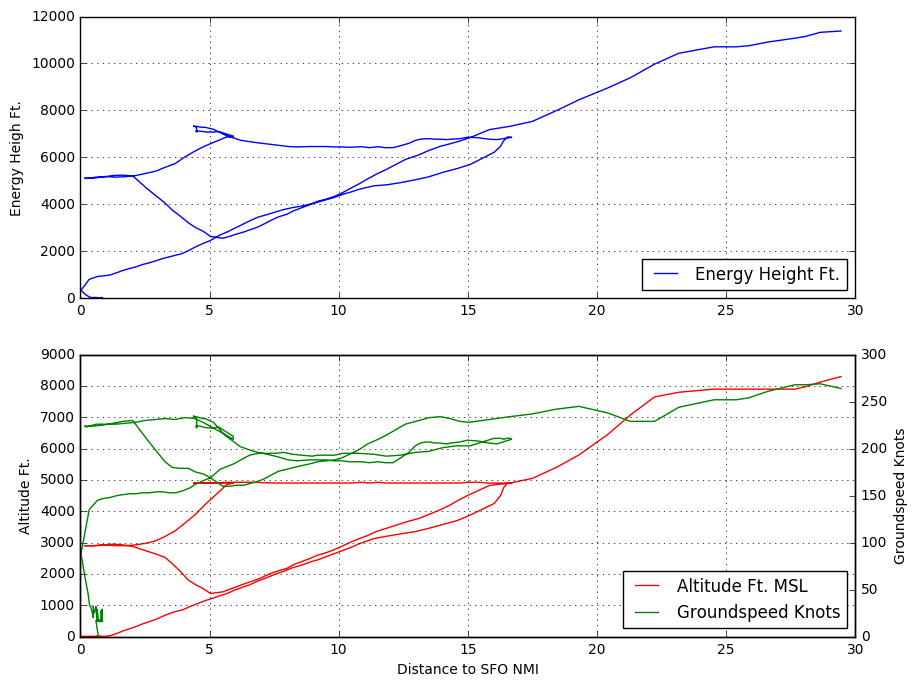

In [4]:
sfo_lat = 37.6188056
sfo_lon = -122.3754167
sfo_location = np.array((sfo_lat,sfo_lon,0))

flight_dist = []
flight_eheight = []
flight_alt = []
flight_speed = []
flight_counter = []

counter = 0

fileRead = "data/UA728_8ff29f6_03042016.csv"

with open(fileRead, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    csvreader.next()
    for row in csvreader:
        lat,lon = row[3].split(",")
        point_location = np.array((float(lat),float(lon),float(row[4])))
        distanceSFO_nmi = (vincenty(point_location, sfo_location).miles*0.868976)
        if distanceSFO_nmi <= 30.0:
            counter+=1
            eheight_ft = float(row[4]) + ((float(row[5])) * (float(row[5])) * 0.5144 * 0.5144)/(2*9.81)*3.28
            flight_alt.append(float(row[4]))
            flight_speed.append(float(row[5]))
            flight_dist.append(distanceSFO_nmi)
            flight_eheight.append(eheight_ft)
            flight_counter.append(float(row[0])-1457099713)
            
## Figure 1
fig = plt.figure(1)
ax = fig.add_subplot(211)
ax.plot(flight_dist,flight_eheight,'b-',label='Energy Height Ft.')
ax.grid()
ax.legend(loc=4)
ax.set_ylabel("Energy Heigh Ft.")

ax = fig.add_subplot(212)
ax2 = ax.twinx()
plt2 = ax.plot(flight_dist,flight_alt,'r-',label='Altitude Ft. MSL')
plt3 = ax2.plot(flight_dist,flight_speed,'g-',label='Groundspeed Knots')

plts = plt2+plt3
labs = [l.get_label() for l in plts]
ax.grid()
ax.legend(plts,labs,loc=4)
ax.set_xlabel("Distance to SFO NMI")
ax.set_ylabel("Altitude Ft.")
ax2.set_ylabel("Groundspeed Knots")




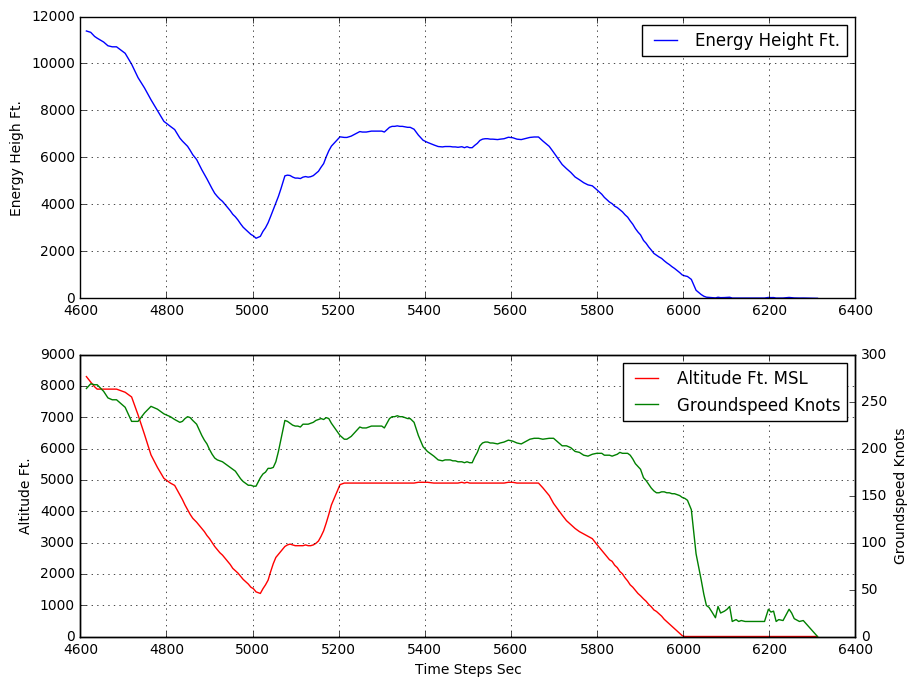

In [5]:
## Figure 2
fig = plt.figure(2)
ax = fig.add_subplot(211)
ax.plot(flight_counter,flight_eheight,'b-',label='Energy Height Ft.')
ax.grid()
ax.legend(loc=0)
ax.set_ylabel("Energy Heigh Ft.")

ax = fig.add_subplot(212)
ax2 = ax.twinx()
plt2 = ax.plot(flight_counter,flight_alt,'r-',label='Altitude Ft. MSL')
plt3 = ax2.plot(flight_counter,flight_speed,'g-',label='Groundspeed Knots')

plts = plt2+plt3
labs = [l.get_label() for l in plts]
ax.grid()
ax.legend(plts,labs,loc=0)
ax.set_xlabel("Time Steps Sec")
ax.set_ylabel("Altitude Ft.")
ax2.set_ylabel("Groundspeed Knots")